In [7]:
import numpy as np

def convolution(x, h):
    lengthA=len(x)
    lengthB=len(h)
    y = np.zeros(lengthA + lengthB -1)
    for m in np.arange(lengthA):
        for n in np.arange(lengthB):
            y[n+m] = y[m+n] + x[m] * h[n]
    return y

x = [1., 2., 3., 4., 5. ]
h = [3., -1., 2., 1. ]

y = convolution(x,h)
print(y) # [3, 5, 9, 14, 19, 6, 14, 5]

y1= np.convolve(x,h)
print(y1)

[ 3.  5.  9. 14. 19.  6. 14.  5.]
[ 3.  5.  9. 14. 19.  6. 14.  5.]


In [12]:
import numpy as np 

def convolution(x, h):
    lengthA=len(x)
    lengthB=len(h)
    y = np.zeros(lengthA + lengthB -1)
    for m in np.arange(lengthA):
        for n in np.arange(lengthB):
            y[n+m] = y[m+n] + x[m] * h[n]
    return y


def correlation(x,h):
    return convolution(x,h[::-1]) #콘볼루션은 뒤집어서 계산하는거라서, 다시 뒤집는거임.

x = [1., 2., 3., 4., 5. ]
h = [3., -1., 2., 1. ]

y = correlation(x,h) # Cross- correlation
print(y)

y1 = correlation(x,x) #Auto-correlation
print(y1)

[ 1.  4.  6. 11. 16. 15.  7. 15.]
[ 5. 14. 26. 40. 55. 40. 26. 14.  5.]


### <실습 문제 5-3>

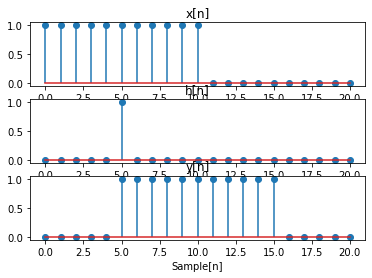

In [20]:
import matplotlib.pyplot as plt

tmin = 0 
tmax = 20
n = np.arange(tmin, tmax+1)
length = len(n)

x = np.zeros(length)
h = np.zeros(length)

x[0:11] = 1
h[5] = 1

y = convolution(x,h)

plt.subplot(311), plt.stem(x), plt.title('x[n]')
plt.subplot(312), plt.stem(h), plt.title('h[n]')
plt.subplot(313), plt.stem(y[0:21]), plt.title('y[n]')
plt.xlabel('Sample[n]')
plt.show()

(c) y[n] 의 출력 식을 x[n]으로 표현하시오.

y[n] = x[n-5]

### < 실습문제 5-4 >

In [10]:
import numpy as np
from scipy.io import wavfile
import pygame
import pygame.mixer
from time import sleep

def Play_sound(filename):
    pygame.mixer.init()
    sound = pygame.mixer.Sound(filename)
    tmp = sound.play()
    while tmp.get_busy():
        pygame.time.delay(1)

def convolution(x, h):
    lengthA=len(x)
    lengthB=len(h)
    y = np.zeros(lengthA + lengthB -1)
    for m in np.arange(lengthA):
        for n in np.arange(lengthB):
            y[n+m] = y[m+n] + x[m] * h[n]
    return y

fs, x= wavfile.read('./오디오샘플/dt.wav')

h1 = np.array([1,1,1,1,1])/5 #averaging 5구간
h2 = np.array([1,1,1,1,1,1,1,1,1,1])/10 #averaging 10구간.
h3 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])/20
# averaging 구간이 길어질 수록 블러링이 더 되지요

h4 = np.array([1,-1,1,-1,1,-1,1,-1,1,-1]) # 하이패스 얘는 샤프닝인듯, 날카로움

y = convolution(x,h1)
y=np.cast['int16'](y)

wavfile.write('Out_a.wav',fs, y)

Play_sound('Out_a.wav')

(e)  
블러처리된것처럼 흐릿하게 들림.  
블러링 : LPF - 샤프링과는 다르게 그 경계를 뭉게뜨림 average  
샤프닝 : HPF - 특징적 부분(변화가 심한)을 급발진시켜서 날카롭게 들림.

### < 실습 5-5 > - correlation

(<AxesSubplot:title={'center':'R[n] : correlation result'}>,
 Text(0.5, 1.0, 'R[n] : correlation result'))

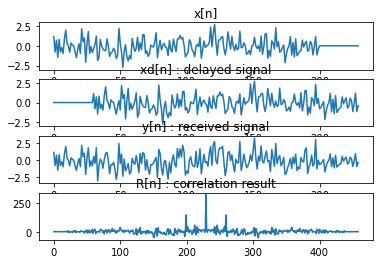

In [19]:
import numpy as np 
import matplotlib.pyplot as plt

def convolution(x, h):
    lengthA=len(x)
    lengthB=len(h)
    y = np.zeros(lengthA + lengthB -1)
    for m in np.arange(lengthA):
        for n in np.arange(lengthB):
            y[n+m] = y[m+n] + x[m] * h[n]
    return y


def correlation(x,h):
    return convolution(x,h[::-1])

num_samples = 200
delay = 30

x = np.zeros(num_samples + delay) # x[n] + 30 공간
n = np.random.randn(1, 200)
x[0:num_samples] = n[:] # 뒤에 30은 남음

xd = np.zeros(num_samples + delay) # 30딜레이 먼저 + x[n]
xd[30:230] = x[0:200] # 뒷부분에 x[n] 넣기

y = x + 0.8*xd

R = correlation(y,y) # auto-correlation

plt.subplot(411), plt.plot(x), plt.title('x[n]')
plt.subplot(412), plt.plot(xd), plt.title('xd[n] : delayed signal')
plt.subplot(413), plt.plot(y), plt.title('y[n] : received signal')
plt.subplot(414), plt.plot(R), plt.title('R[n] : correlation result')